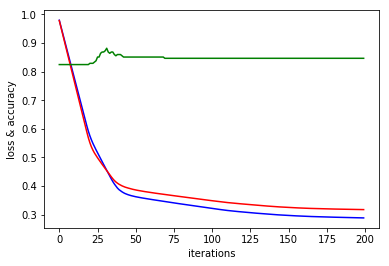

In [5]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# define objective function
def objective_fun(x):
    return np.dot(x, theta[:14].reshape(14, 1))[0][0]+b
def classify_fun(x):

    if objective_fun(x)>=0:
        return 1
    else:
        return -1


# define loss function
def loss_fun(given_x, given_y):
    loss = 0
    for curr_x, curr_y in zip(given_x, given_y):
        curr_x = curr_x.toarray()
        loss += max(0,1-curr_y*objective_fun(curr_x))

    return loss


# load data set
X, y = load_svmlight_file("F:/trainingdata/australian_scale.txt")

# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

theta = np.zeros(14)
b=0
C=0.5
learning_rate = 0.0001
iteration_num = 200
train_losses = []
test_losses = []
accuracy=[]
for i in range(iteration_num):

    Gradient_theta = np.zeros(14).reshape(1, 14)
    Gradient_b = 0
    for curr_x, curr_y in zip(X_train, y_train):
         curr_x = curr_x.toarray()
         # calculate gradient

         if (1-curr_y*objective_fun(curr_x))>=0 :
            Gradient_theta+=C*(-curr_y*curr_x)
            Gradient_b+=(-curr_y)
    Gradient_theta+=theta
    theta = theta - learning_rate * Gradient_theta
    b = b - learning_rate * Gradient_b
    train_losses.append((loss_fun(X_train, y_train) / y_train.size))
    test_losses.append(loss_fun(X_test, y_test) / y_test.size)
    acc=0
    #compute accurrcy
    for curr_x, curr_y in zip(X_test, y_test):
        curr_x=curr_x.toarray()
        if classify_fun(curr_x)==curr_y:
            acc+=1
    accuracy.append(acc/y_test.size)
plt.plot(train_losses,'b',test_losses,'r',accuracy,'g')
#蓝色为train_loss，红色为test_loss
plt.xlabel('iterations')
plt.ylabel('loss & accuracy')
plt.show()